## Import necessary libraries

In [17]:
# Import core libraries for data analysis. `pandas` is used to load and manipulate tabular data.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Load your dataset

In [8]:
# Read the PrePlacement.csv file into a DataFrame named `dataset`. Update the path if your file lives elsewhere.
dataset=pd.read_csv("PrePlacement.csv")

In [9]:
# === Peek at data ===
# Display the DataFrame to quickly inspect columns and values.
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
# === Missing values check ===
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Covariance matrix (Bivariate summary)

In [12]:
# Compute pairwise covariance between numeric variables to see how they vary together.
# Select only numeric columns to avoid 'could not convert string to float' errors
num_df = dataset.select_dtypes(include='number')
cov_matrix = num_df.cov(min_periods=1)  # safe even with some NaNs
cov_matrix

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,1.138318e+04
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,11383.177570,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [22]:
def analyze_covariance(dataset, col1, col2):
    """
    Show covariance, sign interpretation, explanation, scatterplot, and heatmap 
    for two selected numeric columns.
    """
    # 1. Calculate covariance
    cov_value = dataset[[col1, col2]].cov().iloc[0,1]
    
    # 2. Determine sign (positive / neutral / negative)
    if cov_value > 0:
        sign_text = "Positive"
    elif cov_value < 0:
        sign_text = "Negative"
    else:
        sign_text = "Neutral (≈ 0)"
    
    # 3. Markdown explanation
    explanation = f"""
    # 📝 Simple Explanation  

    **Covariance = {cov_value:.2f} → {sign_text}**  

    - ✅ When **{col1}** increases, **{col2}** tends to 
      {'increase' if cov_value > 0 else 'decrease' if cov_value < 0 else 'stay unrelated'}.  
    - ℹ️ If the value is **large**, they move strongly together; 
      if **small/near zero**, the relationship is weak.  
    - 📈 Scatterplot shows dots with a **red line** for the trend.  
    - 🟦 Heatmap shows the covariance in a **colored table format**.  
    """
    display(Markdown(explanation))
    
    # 4. Scatterplot
    sns.regplot(x=col1, y=col2, data=dataset,
                scatter_kws={'alpha':0.6, 'color':'skyblue'},
                line_kws={'color':'red'})
    plt.title(f"{col1} vs {col2} (Cov ≈ {cov_value:.2f}, {sign_text})")
    plt.show()
    
    # 5. Heatmap
    sns.heatmap(dataset[[col1,col2]].cov(), annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"Covariance Heatmap: {col1} & {col2}")
    plt.show()

## 🔹 Example 1: Covariance Analysis — etest_p vs mba_p


    # 📝 Simple Explanation  

    **Covariance = 16.89 → Positive**  

    - ✅ When **etest_p** increases, **mba_p** tends to 
      increase.  
    - ℹ️ If the value is **large**, they move strongly together; 
      if **small/near zero**, the relationship is weak.  
    - 📈 Scatterplot shows dots with a **red line** for the trend.  
    - 🟦 Heatmap shows the covariance in a **colored table format**.  
    

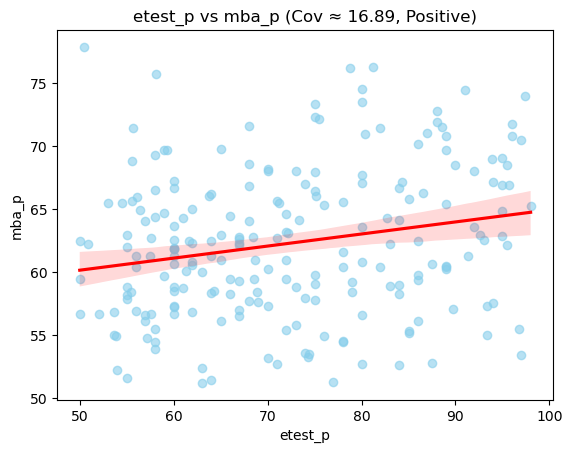

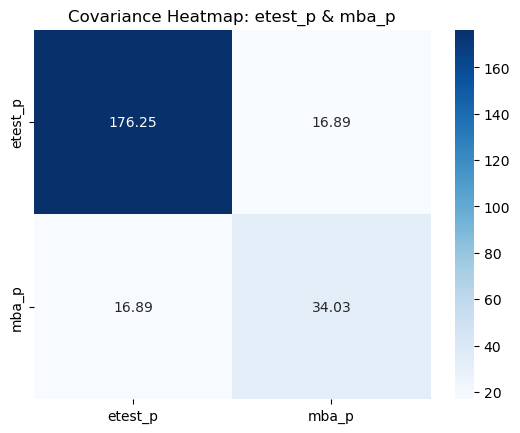

## 🔹 Example 2: Covariance Analysis — degree_p vs etest_p


    # 📝 Simple Explanation  

    **Covariance = 22.08 → Positive**  

    - ✅ When **degree_p** increases, **etest_p** tends to 
      increase.  
    - ℹ️ If the value is **large**, they move strongly together; 
      if **small/near zero**, the relationship is weak.  
    - 📈 Scatterplot shows dots with a **red line** for the trend.  
    - 🟦 Heatmap shows the covariance in a **colored table format**.  
    

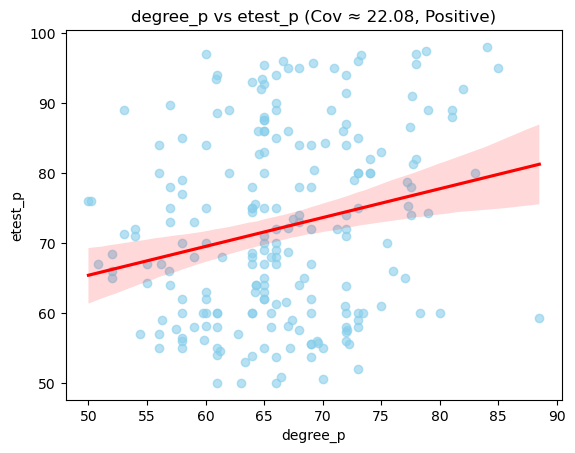

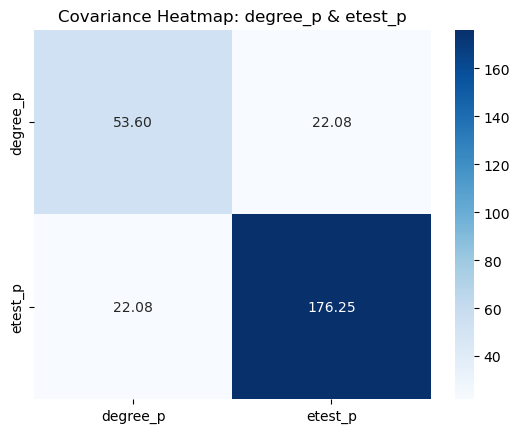

In [23]:
# Example 1: etest_p vs mba_p
display(Markdown("## 🔹 Example 1: Covariance Analysis — etest_p vs mba_p"))
analyze_covariance(dataset, "etest_p", "mba_p")

# Example 2: degree_p vs etest_p
display(Markdown("## 🔹 Example 2: Covariance Analysis — degree_p vs etest_p"))
analyze_covariance(dataset, "degree_p", "etest_p")

## Corelation matrix (Bivariate strength)

In [13]:
# Compute pairwise Pearson correlations to measure linear relationships between variables (range: -1 to 1).
# Correlation on numeric columns only (use numeric_only for pandas >= 2.0 if desired)
num_df = dataset.select_dtypes(include='number')
corr_matrix = num_df.corr()  # alternatively: dataset.corr(numeric_only=True)
corr_matrix

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000
